<a href="https://colab.research.google.com/github/wlgp8563/2023RNN/blob/main/RNN_%EA%B0%90%EC%84%B1%EB%B6%84%EB%A5%98_%EC%A0%95%EC%83%81%EC%9E%91%EB%8F%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!apt install python3.7
!pip install pytorch-pretrained-bert
!pip install keras
!pip install torch

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib python3.7-minimal
Suggested packages:
  python3.7-venv binfmt-support
The following NEW packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib python3.7 python3.7-minimal
0 upgraded, 4 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,531 kB of archives.
After this operation, 23.3 MB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 libpython3.7-minimal amd64 3.7.17-1+focal1 [589 kB]
Get:2 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 python3.7-minimal amd64 3.7.17-1+focal1 [1,808 kB]
Get:3 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 libpython3.7-stdlib amd64 3.7.17-1+focal1 [1,774 kB]
Get:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 python3.7 amd64 3.

In [21]:
!pip install -U torchtext==0.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.7 MB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.15.2
    Uninstalling torchtext-0.15.2:
      Successfully uninstalled torchtext-0.15.2


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

In [24]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [4]:
train = pd.read_csv('/content/drive/MyDrive/train.csv', encoding='utf-8')   #훈련 데이터셋 불러오기기
test = pd.read_csv('/content/drive/MyDrive/test.csv', encoding='utf-8')   #test 데이터셋 불러오기기

In [25]:
print('첫번째 훈련용 리뷰 :',X_train[0])
print('첫번째 훈련용 리뷰의 레이블 :',y_train[0])

첫번째 훈련용 리뷰 : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
첫번째 훈련용 리뷰의 레이블 : 1


리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


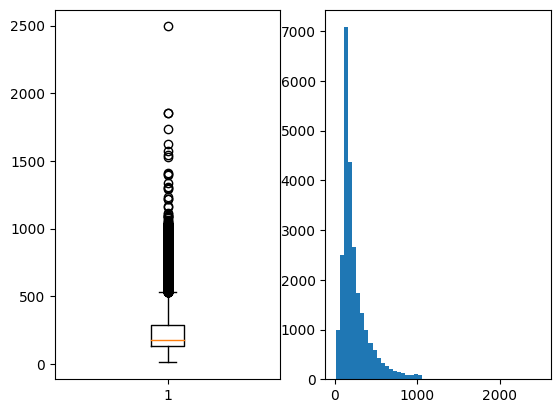

In [26]:
reviews_length = [len(review) for review in X_train]

print('리뷰의 최대 길이 : {}'.format(np.max(reviews_length)))
print('리뷰의 평균 길이 : {}'.format(np.mean(reviews_length)))
len_result = [len(s) for s in X_train]

plt.subplot(1,2,1)
plt.boxplot(reviews_length)
plt.subplot(1,2,2)
plt.hist(len_result, bins=50)
plt.show()

In [27]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


In [28]:
word_to_index = imdb.get_word_index()
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key

In [29]:
print('빈도수 상위 1등 단어 : {}'.format(index_to_word[4]))

빈도수 상위 1등 단어 : the


In [30]:
print('빈도수 상위 3938등 단어 : {}'.format(index_to_word[3941]))

빈도수 상위 3938등 단어 : suited


In [31]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

print(' '.join([index_to_word[index] for index in X_train[0]]))

<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shoul

In [32]:
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

vocab_size = 10000
max_len = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [33]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 0.5454 - acc: 0.7128
Epoch 1: val_acc improved from -inf to 0.81100, saving model to GRU_model.h5
313/313 [==============================] - 56s 155ms/step - loss: 0.5454 - acc: 0.7128 - val_loss: 0.4111 - val_acc: 0.8110
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 0.3440 - acc: 0.8557
Epoch 2: val_acc did not improve from 0.81100
313/313 [==============================] - 30s 97ms/step - loss: 0.3440 - acc: 0.8557 - val_loss: 2.2510 - val_acc: 0.5088
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 0.2860 - acc: 0.8871
Epoch 3: val_acc improved from 0.81100 to 0.86660, saving model to GRU_model.h5
313/313 [==============================] - 20s 63ms/step - loss: 0.2860 - acc: 0.8871 - val_loss: 0.3900 - val_acc: 0.8666
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 0.2436 - acc: 0.9078
Epoch 4: val_acc improved from 0.86660 to 0.87240, saving model

In [34]:
loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 7s 8ms/step - loss: 0.4221 - acc: 0.8800

 테스트 정확도: 0.8800


In [35]:
def sentiment_predict(new_sentence):
  # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
  new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()
  encoded = []

  # 띄어쓰기 단위 토큰화 후 정수 인코딩
  for word in new_sentence.split():
    try :
      # 단어 집합의 크기를 10,000으로 제한.
      if word_to_index[word] <= 10000:
        encoded.append(word_to_index[word]+3)
      else:
      # 10,000 이상의 숫자는 <unk> 토큰으로 변환.
        encoded.append(2)
    # 단어 집합에 없는 단어는 <unk> 토큰으로 변환.
    except KeyError:
      encoded.append(2)

  pad_sequence = pad_sequences([encoded], maxlen=max_len)
  score = float(loaded_model.predict(pad_sequence)) # 예측

  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [36]:
from google.colab import drive     #구글 내 드라이브에 필요한 데이터셋 저장 후 불러오기 위해 사용용
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
cha = pd.read_csv('/content/drive/MyDrive/Movie_Characters.csv', encoding='cp949')   #데이터셋 불러오기기
dia = pd.read_csv('/content/drive/MyDrive/Dialogue.csv', encoding='cp949')    #대사 데이터셋 읽기기

In [38]:
import seaborn as sns
from matplotlib import pyplot as plt
from pandas import Series, DataFrame

In [39]:
sort = cha.sort_values(by=['Character ID', 'House'])   #Charcater ID를 오름차순으로 정렬한 것을 House별로 정렬
sort
newsort = sort.loc[:, "Character ID":"House"]         #Character ID부터 House까지의 데이터로 축소
newsort

,Character ID,Character Name,Species,Gender,House
0,1,Harry Potter,Human,Male,Gryffindor
1,2,Ron Weasley,Human,Male,Gryffindor
2,3,Hermione Granger,Human,Female,Gryffindor
3,4,Albus Dumbledore,Human,Male,Gryffindor
4,5,Rubeus Hagrid,Half-Human/Half-Giant,Male,Gryffindor
...,...,...,...,...,...
161,162,Waiter,NaN,NaN,NaN
162,163,Boy 2,NaN,NaN,NaN
163,164,Crowd,NaN,NaN,NaN
164,165,Gryffindors,NaN,NaN,NaN


In [40]:
clean_dia = dia.loc[:, "Dialogue ID":"Dialogue"]  #불필요한 열 삭제
clean_dia
sort_dia = clean_dia.sort_values(by='Character ID')    #Character ID 오름차순으로 정렬
sort_dia

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue
1472,1482,54,46,1,Come on.
1741,1752,64,25,1,You wait here and try and shift some of this r...
1743,1754,64,25,1,Hesha- Hassah.
1744,1755,65,25,1,"Ginny Ginny! Oh, Ginny, please don't be dead. ..."
1746,1757,65,25,1,"Tom. Tom Riddle! What do you mean, 'she won't ..."
...,...,...,...,...,...
1082,1087,41,71,162,Oy! What do you two think you're doing?
356,357,15,52,163,"Oh, that was wicked, Harry."
527,528,20,51,164,Go go Gryffindor! Go go Gryffindor! Go go Gryf...
507,508,19,51,165,Yay!


In [42]:
chadia = pd.merge(newsort, sort_dia)        #newsort_dia와 sort_dia 표 내용 합치기기
chadia

,Character ID,Character Name,Species,Gender,House,Dialogue ID,Chapter ID,Place ID,Dialogue
0,1,Harry Potter,Human,Male,Gryffindor,1482,54,46,Come on.
1,1,Harry Potter,Human,Male,Gryffindor,1752,64,25,You wait here and try and shift some of this r...
2,1,Harry Potter,Human,Male,Gryffindor,1754,64,25,Hesha- Hassah.
3,1,Harry Potter,Human,Male,Gryffindor,1755,65,25,"Ginny Ginny! Oh, Ginny, please don't be dead. ..."
4,1,Harry Potter,Human,Male,Gryffindor,1757,65,25,"Tom. Tom Riddle! What do you mean, 'she won't ..."
...,...,...,...,...,...,...,...,...,...
7429,162,Waiter,NaN,NaN,NaN,1087,41,71,Oy! What do you two think you're doing?
7430,163,Boy 2,NaN,NaN,NaN,357,15,52,"Oh, that was wicked, Harry."
7431,164,Crowd,NaN,NaN,NaN,528,20,51,Go go Gryffindor! Go go Gryffindor! Go go Gryf...
7432,165,Gryffindors,NaN,NaN,NaN,508,19,51,Yay!


In [46]:
house_Gry = chadia[chadia['House'] == 'Gryffindor']         #위의 데이터셋에서 기숙사가 그리핀도르에 해당되는 열만 가져와 저장
house_Gry

,Character ID,Character Name,Species,Gender,House,Dialogue ID,Chapter ID,Place ID,Dialogue
0,1,Harry Potter,Human,Male,Gryffindor,1482,54,46,Come on.
1,1,Harry Potter,Human,Male,Gryffindor,1752,64,25,You wait here and try and shift some of this r...
2,1,Harry Potter,Human,Male,Gryffindor,1754,64,25,Hesha- Hassah.
3,1,Harry Potter,Human,Male,Gryffindor,1755,65,25,"Ginny Ginny! Oh, Ginny, please don't be dead. ..."
4,1,Harry Potter,Human,Male,Gryffindor,1757,65,25,"Tom. Tom Riddle! What do you mean, 'she won't ..."
...,...,...,...,...,...,...,...,...,...
7207,94,Katie Bell,Human,Female,Gryffindor,5419,176,36,"Give me a moment, girls."
7240,106,Colin Creevey,Human,Male,Gryffindor,1160,44,36,"Hi, Harry! I'm Colin Creevy! I'm in Gryffindo..."
7241,106,Colin Creevey,Human,Male,Gryffindor,1204,46,45,"Wow! Can you turn him around, Harry?"
7250,111,Nigel Wolpert,Human,Male,Gryffindor,3123,116,36,Parcel for you Mr Weasley.


In [48]:
gry_dia = house_Gry["Dialogue"]
gry_dia

0                                                Come on.
1       You wait here and try and shift some of this r...
2                                          Hesha- Hassah.
3       Ginny Ginny! Oh, Ginny, please don't be dead. ...
4       Tom. Tom Riddle! What do you mean, 'she won't ...
                              ...                        
7207                             Give me a moment, girls.
7240    Hi, Harry!  I'm Colin Creevy! I'm in Gryffindo...
7241                 Wow! Can you turn him around, Harry?
7250                           Parcel for you Mr Weasley.
7251    River, DA calling. Do you read? We have a new ...
Name: Dialogue, Length: 5362, dtype: object

In [56]:
house_Sly = chadia[chadia['House'] == 'Slytherin']         #위의 데이터셋에서 기숙사가 그리핀도르에 해당되는 열만 가져와 저장
house_Sly

sly_dia = house_Sly["Dialogue"]
sly_dia

4330    You've just bought yourself a month's detentio...
4331                                              Please.
4332    Expelliarmus! Vengeance is sweet. How I hoped ...
4333                                           Take them!
4334    I told Dumbledore you were helping an old frie...
                              ...                        
7239                         Have you ever taken it, sir?
7258       Blood traitor, abomination, shame of my flesh!
7259    Filth! Scum! Half-breeds, mutants, freaks, beg...
7262                                        Whoo-hoo-hoo!
7265    Put a smile on, Miss Reynolds. Wouldn't want m...
Name: Dialogue, Length: 860, dtype: object

In [57]:
house_Rav = chadia[chadia['House'] == 'Ravenclaw']         #위의 데이터셋에서 기숙사가 그리핀도르에 해당되는 열만 가져와 저장
house_Rav

rav_dia = house_Rav["Dialogue"]
rav_dia

6143                          Whenever you're ready, sir.
6144    You're bleeding, Harry. That's a curious thing...
6145                                          Ron? Harry?
6146                           Quibbler...?  Quibbler...?
6147    There's an article on Wrackspurts this month. ...
                              ...                        
7228                                            Hi Harry.
7229             Are you going to ask me to dance or not?
7230         Is that Hermione Granger? With Viktor Krum??
7264    I for one would like to know why Potter's qual...
7269    Dunno.  He and me dad don't get on. Probably b...
Name: Dialogue, Length: 222, dtype: object

In [58]:
house_Huf = chadia[chadia['House'] == 'Hufflepuff']         #위의 데이터셋에서 기숙사가 그리핀도르에 해당되는 열만 가져와 저장
house_Huf

huf_dia = house_Huf["Dialogue"]
huf_dia

6580                                          What is it?
6581     Are you serious? And Fleur and Krum, do they...?
6582                                          Hey Potter.
6583                                             Yes sir.
6584                          What are you talking about?
6585          It's a portkey. Harry the cup is a portkey.
6586                                        Where are we?
6587    You know for a moment there I thought you were...
6588                                             Alright.
6589                       Who are you? What do you want?
6590                                              You ok?
6591                           Go. Take it, you saved me!
6592                                       Some game huh?
6593                                        Harry! Harry!
6594    Harry take my body back will you? Take my body...
6595                                         How are you?
6596                                          Get off me!
6597    Look I

In [52]:
def sentiment_predict(series):
    result = []
    for sentence in series:
        new_sentence = re.sub('[^0-9a-zA-Z ]', '', sentence).lower()
        encoded = []
        for word in new_sentence.split():
            try:
                if word_to_index[word] <= 10000:
                    encoded.append(word_to_index[word] + 3)
                else:
                    encoded.append(2)
            except KeyError:
                encoded.append(2)
        pad_sequence = pad_sequences([encoded], maxlen=max_len)
        score = float(loaded_model.predict(pad_sequence))
        if score > 0.5:
            result.append('긍정')
        else:
            result.append('부정')
    return pd.Series(result, name='sentiment')

In [53]:
test_gry = gry_dia

In [54]:
sentiment_predict(test_gry)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 43ms/step


0       부정
1       긍정
2       부정
3       부정
4       긍정
        ..
5357    긍정
5358    긍정
5359    긍정
5360    긍정
5361    긍정
Name: sentiment, Length: 5362, dtype: object

In [59]:
sentiment_predict(sly_dia)

1/1 [==============================] - 0s 24ms/step


0      긍정
1      부정
2      긍정
3      부정
4      긍정
       ..
855    긍정
856    부정
857    긍정
858    부정
859    긍정
Name: sentiment, Length: 860, dtype: object

In [60]:
sentiment_predict(huf_dia)

1/1 [==============================] - 0s 23ms/step


0     긍정
1     긍정
2     부정
3     부정
4     긍정
5     긍정
6     부정
7     긍정
8     부정
9     긍정
10    부정
11    부정
12    부정
13    긍정
14    긍정
15    긍정
16    부정
17    긍정
18    긍정
19    긍정
20    긍정
21    부정
22    긍정
23    긍정
24    긍정
25    부정
26    부정
27    긍정
28    긍정
29    부정
30    부정
31    부정
32    긍정
33    긍정
34    긍정
35    긍정
36    부정
37    긍정
38    긍정
39    긍정
40    부정
41    긍정
42    긍정
43    긍정
44    긍정
45    긍정
46    긍정
47    부정
48    긍정
49    부정
50    긍정
51    긍정
52    부정
53    긍정
54    긍정
55    긍정
Name: sentiment, dtype: object

In [61]:
sentiment_predict(rav_dia)

1/1 [==============================] - 0s 23ms/step


0      긍정
1      긍정
2      부정
3      부정
4      긍정
       ..
217    긍정
218    부정
219    긍정
220    긍정
221    부정
Name: sentiment, Length: 222, dtype: object